# Introduction
What is the problem? 
* Establish a model for the price of a housing district.  This will not be as effective as a manual method of evaluating the value of homes in the long term. 
* The idea is to invest in neighborhoods that are likely undervalued, our model will baseline the value of a neighborhood so downstream we can pinpoint residual values and get insights for how we can generate revenue.  

Why is it important?
The resources to evaluate the thousands of districts across California in person are not available to us - at least to do so profitably.  Getting an idea of accurately identifying the criteria for a valuable neighborhood allows us to examine closely any opportunities that are worth pursuing.  Over evaluating the value could cause resources wasted; under evaluating  the value could cause for lost opportunities.  

What is your basic approach?
The general idea is that we get a handle on the data, then 'shop' for the best model and test out the model that best suits our needs.  Along the way this is going to require an understanding of the features and hazards that the data has to offer.  Managing these parts of the data is what is going to likely require most of the effort.  From there we will build the best suiting model from an array of choices.  Then fine tune the parameters of the model.

# Problem Definition and Algorithm .  

## Precisely define the problem you are addressing (ie formaly specify the inputs and outputs).  Elaborate on why this is an interesting and important problem.  
The dataset that we been given included eleven columns, ten of which were used to predict the median house value of a district. This will let us know areas that are worth investing in.  Interestlying, the fact that we are looking for areas to invest in does not necessarily mean that we are specificly looking for districts to invest in.  Understanding these variables will give us a jumpstart in the event that the data, objective or impact changes at all.  

## Describe in reasonable detail the algorithem you are using to address the problem. 
The final model is a RandomForest.  This is a practical model that is made up of many decision trees and summed together.  A Decision Tree is a very 'human' ML algorithm that separates patterns in the data based on different values and creating rules in the shape of - you guessed it a tree.  A RandomForest creates many mini trees and collaborates to generate the best value. 

# Experimental Evaluation 
## Methodology
Describe the experimental methodology that you used. 

What are the criteria you are using to evaluate your method? 
    Root Mean Square Error: This looks for the smallest 'spread' of residuals.

What specific hypotheses does your experiment test? 
    Null Hypothesis: No variables have a significant correlation with median_house_value and productive models cannot be built
    Alternative Hypothesis: At least one variable has a significant correlation with median_house_value and productictive models can be built.  

What are the dependent and independent variables? 
    Dependent Varaible: median_house_value 
    Independent  Variable:income_cat, INLAND, pop_per_hhold, longitude, latitude, bedrooms_per_room, rooms_per_hhold, housing_median_age, population, total_rooms, households, total_bedrooms, <1H OCEAN, NEAR OCEAN, NEAR BAY, ISLAND

What is the training/test data was used, and why is it realistic or interesting? 
    Using a relativly standard practice, I withheld 20% of the data for testing.  What is interesting, is the emphasis that median_income has, thus it was best to stratify that variable across the datasets to ensure proper evaluation.  

What are the performance measures and how are you presenting and analyzing them? 
    Root Mean Square Error


# Download the Data

In [1]:
import os 
import tarfile 
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()    

Now that we hav installed the data directly from the source, we should package it into a pandas dataframe.

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
df = load_housing_data()

# Establish understanding of the data
Because of my insight that the data has some odd rules, it would be best to take a 'peek under the hood' and establishing the expectations for the data before any steps forward. 

In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Taken a peek at the first 10 rows and info() we get access to the following insights

### Dataset Features
* Index is included 
* Only 10 columns are included 
* Data appears to be aggregated - each row is a district
* Some values that may be integers are expressed as floats 
* Only one variable is non-numeric
* All variables are non-null values 
* total_bedrooms appears to be missing some rows
* There are 20640 districts in the dataset
* ocean_proximity is an object, but from our sample it appears to load as a string
* The median household income appears... low for someone who lives in a $500,000 home.  The explanation is that the data has been scaled and capped at 15.  The rule appears to be actual_income =median_income*10^4.  
* The memory used is approximately 1.6 MB - sufficient for machine learning and capable of processing on almost any machine



In [5]:
df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


    A more intuitive method of giving a quick summary of the data is using the following histogram

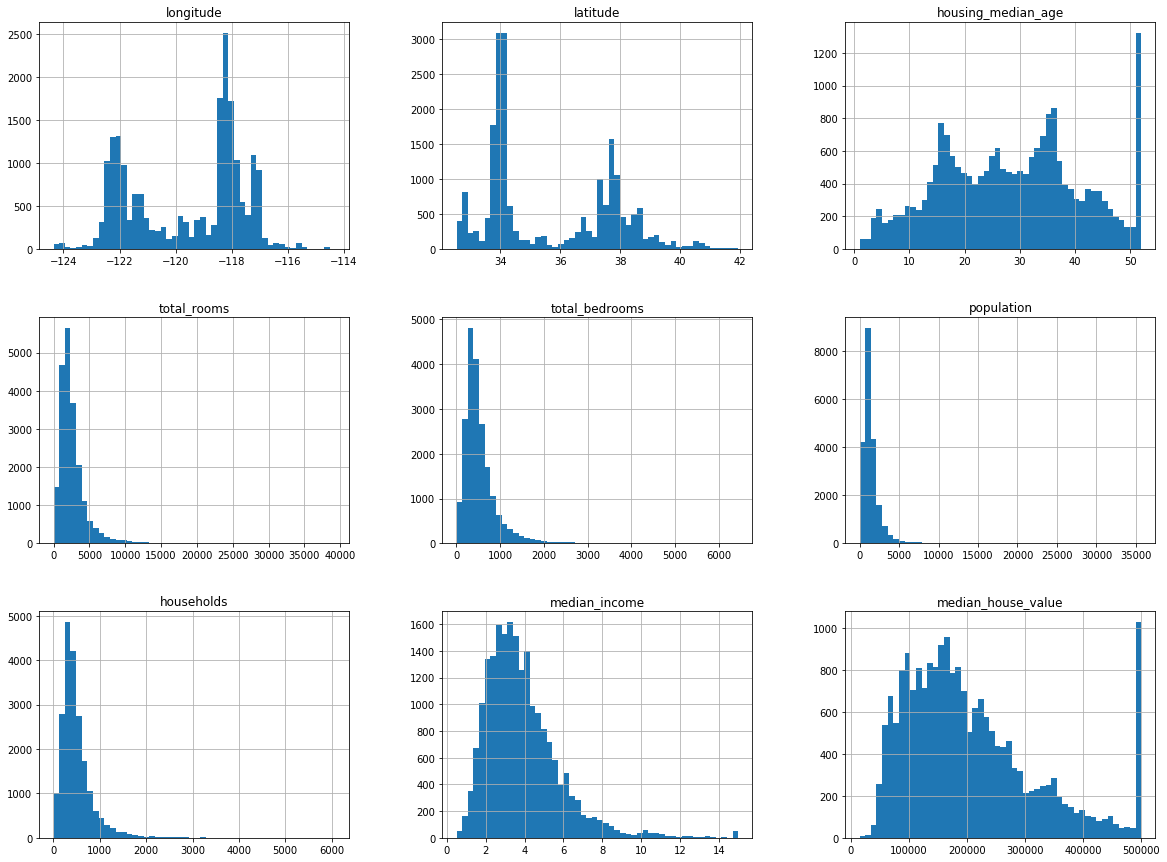

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

This gives us some detail that we have previously overlooked. 

* There appears to be an unpresidented surge in age and household value among the districts contain the maximum value this apparently is because these values are capped as well.  This would be a major hazard if the model hence it would have no knowledge that homes are worth more than $500000.
* The values Households, median_income, population, total_bedrooms and total_rooms are all left scued.  Having data represent the truth is highly valueable for common reporting purposes, but in the future we may want to scale these values for machine learning accuracy.  

It does appear that the only value in ocean_proximity is 'NEAR BAY' if we take a closer look we see that there are 5 categories: 1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND

In [7]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Creating the test set
Below we want to create the test dataset, withholding 20% of the volume from the training set for testing.  This is the best known method for ensuring against overfit as well as validating the results of the model.  The function below distributes the rows into each set randomly, like dealing 4 out of 5 cards into the train set and 1 out of 5 cards into the test set.  The below function is a trusted industry standard for solving this problem. 

In [8]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.2, random_state=42)

# Twist: 
Supposedly, median income is an important attribute to predict median housing prices - intuitively I agree with this.  This factor should be the most important attribute when building the model. Reviewing the data above, the income appeared to be slightly left scued with a cap on the high end.  This is a variable that will have to be

In [9]:
import numpy as np
df['income_cat']= pd.cut(df['median_income'],bins = [0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

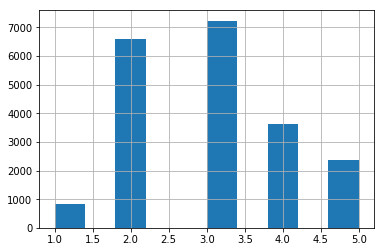

In [10]:
df['income_cat'].hist()

The below loop iterates on the indexes ensuing that the income_cat is evenly distributed through both test sets. 

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

From here we can validate the proportions of the column:

In [12]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Now we know we have the desired test dataframe, we should save this:

In [13]:
housing = strat_train_set.copy()

## Visualizing the geography
If your imagination is ligning up with mine, the below plot looks a lot like a section of California.  The most common areas appear to be the bay area,  LA area and along I5 ~ particulary.  

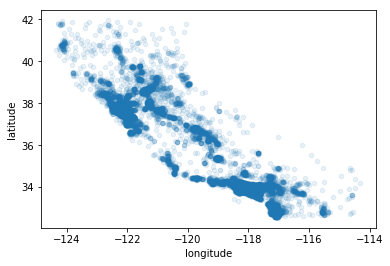

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Taking a deeper dive - When incorporating population and house value you will see that the value is in cities and near the beach.  Although, along the beach there still appears to be highly populated areas with a reasonable home value.  The home values along I5 appear to be quite reasonable. Most astonishingly is in the south bay area, you will see some low house value dots engulf high income dotts, a dynamic proves that geography is no the only driver of home value.  

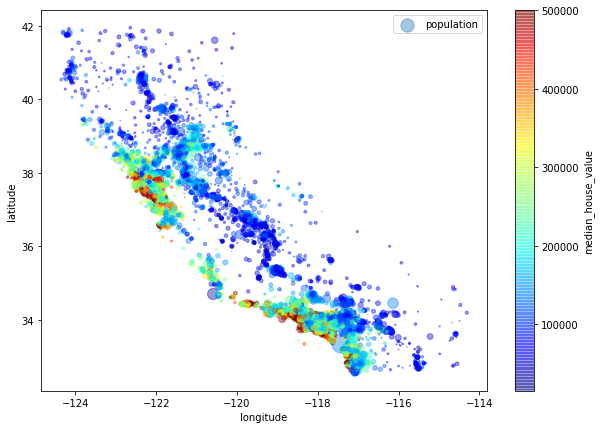

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## Looking for Correlations
This is where we begin to really understand the magic that is going into the model.  The closer the values are to 1.000 or -1.000 (EXCEPT median_house_value), the better the correlation is.  As you can see, the only variable that appears to be significant is median_income - what we already have identified as our primary predictor value.  The sort_values function does not do a perfect job of sorting 'winners and loosers', but it makes it easy to fish them out.

In [16]:

housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Below the focus should be on the top row and first column (Not the intersection), where we have the median_house_value - the primary driver.  Again, median income appears to have the strongest correlation, given it cigar shape in both images.  Total rooms also does have a cigar shape to it, but it has minimal 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148F4866470>,
      dtype=object)

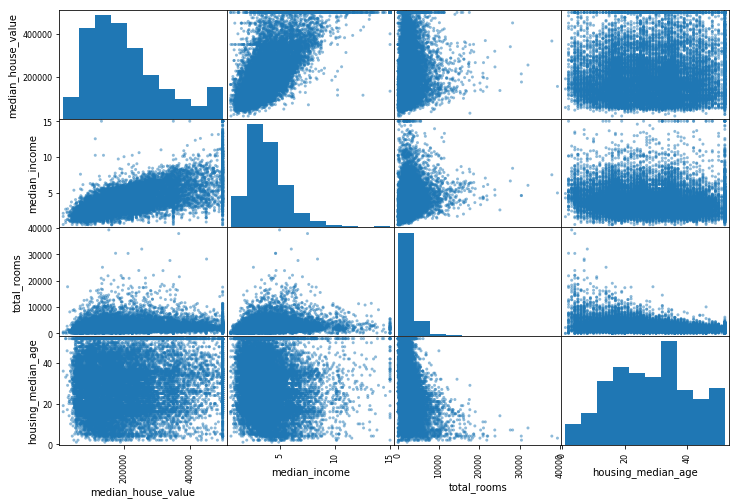

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Given the significance of median_house_value, it is owed a closer look.  In addition to the aforementioned cigar shape, there appears to be minimal noise in this correlation plot.  However, there does exist a vertical line across the top.  There also appear to be lines going across 450000 and 350000, but they do not appear to span across the whole spectrum of indiviuals making over a median income of 10.  

[0, 16, 0, 550000]

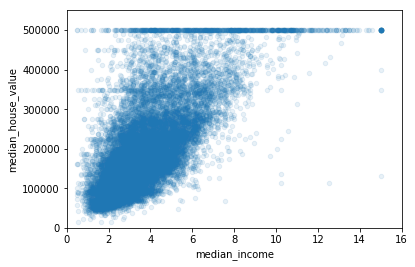

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])


Because the of the nature of aggregate variable on the significance of the model.  The model may likely preform better if we made some adjustments to these variables, giving them a more accurate representation.  
* We reevaluated  the total_rooms to average rooms(rooms per household)
* The frequency of bedrooms in a home (bedrooms per room) 
* Population per household

In [19]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

As you can see, the new values now rank 2nd, 3rd, and 5th in the modle.  

In [20]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Preparing the Model

In [21]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

When treating the nul variables, we are resorting to the median value. Because it is a resiliant variable that will not be affected my major variations in the dataset.  

## Null Values

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

The following text will not be subset because median cannot be calculated on ocean_proximity. 

In [23]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now we actually run the imputer on all vlaues. 

In [24]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

Now we want to look at the the actuall medians produced:

In [25]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

Now we can apply the imputer to the data. 

In [60]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

## Adjusting Categorical Values

Mostly for performance reasons, the ocean proximity category would be better represented as digits instead of strings - its all the same to the machine... almost.  The machine may recognize 1<5 even though that is not the case.  Thus we will transform this column into dummy variables.    

In [27]:
housing_cat = housing[['ocean_proximity']]
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Custom transformers 

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [30]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [31]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
12655,-121.46,38.52,29,3873,797,2237,706,2.1736,INLAND,2,5.48584,3.16856
15502,-117.23,33.09,7,5320,855,2015,768,6.3373,NEAR OCEAN,5,6.92708,2.6237
2908,-119.04,35.37,44,1618,310,667,300,2.875,INLAND,2,5.39333,2.22333
14053,-117.13,32.75,24,1877,519,898,483,2.2264,NEAR OCEAN,2,3.88613,1.85921
20496,-118.7,34.28,27,3536,646,1837,580,4.4964,<1H OCEAN,3,6.09655,3.16724


## Transformation Pipelines
This is a good way for us to impute our planned out transformations in the requested order.  

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [33]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [34]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [35]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Creating the Model

### Linear Model

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

After building the model and running it, we see that the error is 68,682, this is relatively substantial, particularly on the lower end of houses.  

In [37]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.51254853733

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

After building the model and running it, we see that the there is no error at all.  Either we have built a perfect model, or there is a good case of overfit. 

In [39]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Evaluating the Decision Tree
Now it appears that the estimates are way off and that the tree is overfit to the model. The performance in fact looks worse than the linear model.  

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [41]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175]
Mean: 71275.55141535088
Standard deviation: 2362.02756776275


In [42]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.74612753486


## Random Forest
This appears to be the best model. The rmse appears to substantially the lowest.  

In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [44]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18675.224916252282

In [45]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51553.65292335 48797.89565614 47005.23947642 52046.73567245
 47700.78025873 51824.08544879 52582.59165129 49949.79025967
 48680.25622229 54019.67674791]
Mean: 50416.070431704204
Standard deviation: 2201.612779754884


# Fine Tuning
We will look though the various methods of the hyperparameters to create the best model.  

## Grid Search
It appears that the best parameters includes 6 features. And it has given us the 'secret recipe' for building out the model.  

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [48]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

When evaluating all of the geatures, it appears that as mentioned 6/30 was the best option, but also 8/30 seems to be a great option.  For trivia sake, it appears that 2/3 is the worst model combination.  

In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64794.30269596007 {'max_features': 2, 'n_estimators': 3}
56170.628706376316 {'max_features': 2, 'n_estimators': 10}
53112.07892952066 {'max_features': 2, 'n_estimators': 30}
61836.14128922096 {'max_features': 4, 'n_estimators': 3}
54015.050600771814 {'max_features': 4, 'n_estimators': 10}
51501.312925751794 {'max_features': 4, 'n_estimators': 30}
59654.781331729675 {'max_features': 6, 'n_estimators': 3}
52654.921131020776 {'max_features': 6, 'n_estimators': 10}
50743.74265388978 {'max_features': 6, 'n_estimators': 30}
60051.26348940765 {'max_features': 8, 'n_estimators': 3}
52909.31100796091 {'max_features': 8, 'n_estimators': 10}
50800.78516244517 {'max_features': 8, 'n_estimators': 30}
63176.30025923348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54596.210174483705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.682580275425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53236.2602917408 {'bootstrap': False, 'max_features': 3, 'n_estimator

## Randomized Search
A more preferred way of looking at the results.  This time, it appears that the features we use is 7/180.  The number of estimators is way higher than any evaluated on the grid, and the features appears be similar to my results above.  

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000148F931A8D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000148F9325630>},
                   random_state=42, scoring='neg_mean_squared_error')

In [51]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49799.635737761106 {'max_features': 7, 'n_estimators': 180}
52293.114093913726 {'max_features': 5, 'n_estimators': 15}
51327.353255586764 {'max_features': 3, 'n_estimators': 72}
51528.97117998048 {'max_features': 5, 'n_estimators': 21}
49958.42482333546 {'max_features': 7, 'n_estimators': 122}
51270.531241462595 {'max_features': 3, 'n_estimators': 75}
51172.437672640175 {'max_features': 3, 'n_estimators': 88}
50255.14987044715 {'max_features': 5, 'n_estimators': 100}
50894.38729795359 {'max_features': 3, 'n_estimators': 150}
65022.070435017646 {'max_features': 5, 'n_estimators': 2}


## Analyzing the best model
Below we can tell that most of the fields are important and others can be dropped from the model. 

In [52]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances 

array([6.76445809e-02, 6.24744883e-02, 4.48349664e-02, 1.82692423e-02,
       1.78441912e-02, 1.96046284e-02, 1.81345873e-02, 2.43728155e-01,
       1.64552239e-01, 5.15312129e-02, 1.00601503e-01, 5.56925429e-02,
       1.39077386e-02, 1.13027019e-01, 8.79969201e-05, 2.68765993e-03,
       5.37724723e-03])

In [53]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2437281550348665, 'median_income'),
 (0.164552239433468, 'income_cat'),
 (0.11302701921836558, 'INLAND'),
 (0.10060150315157557, 'pop_per_hhold'),
 (0.0676445808532661, 'longitude'),
 (0.06247448828832202, 'latitude'),
 (0.055692542877701, 'bedrooms_per_room'),
 (0.0515312129253161, 'rooms_per_hhold'),
 (0.04483496644921272, 'housing_median_age'),
 (0.01960462836331055, 'population'),
 (0.01826924231375522, 'total_rooms'),
 (0.018134587277114464, 'households'),
 (0.017844191166034768, 'total_bedrooms'),
 (0.013907738567035366, '<1H OCEAN'),
 (0.0053772472307463915, 'NEAR OCEAN'),
 (0.0026876599298535932, 'NEAR BAY'),
 (8.799692005595e-05, 'ISLAND')]

# Testing
At last, we have completed building the model and it is time for us to evaluate the results.  
The final RMSE looks acceptable - not a nobel award winning model though.  The confidence interval does looks relatively narrow and the model is ready for production.  

In [54]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48557.33618531538

In [55]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46608.81069751, 50430.63116986])

## Results
Present the quantitative results of your experiments, including visualizations
It appears that there is a substantial difference between the variables that have value and the ones that dont: The leverage of population, total_rooms, households, total_bedrooms, Ocean, Near Ocean, Near Bay and Island are insignificant to the model produced today.  


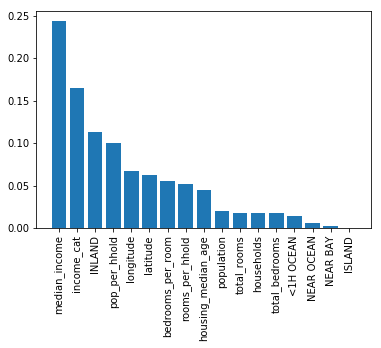

In [56]:
ls = sorted(zip(feature_importances, attributes), reverse=True)
plt.bar([i[1] for i in ls], [i[0] for i in ls])
plt.xticks(rotation = 90)
plt.show()


## Discussion
Is your hypothesis supported? 
    Hypothosis 1: One or more of the variables are correlated and make a significant impact on the data: 
    This alternative hypothesis does not stand given that a variable requires a r of .70 to be considered correlated.  

In [57]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_household,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


Hypothesis 2:
    Productive models can be built with the data.  As mentioned above creating a model with the above random forest.  That being said the Results from the the maximized model had a RMSE of 48557, which given the value of the homes, is acceptable.  There still remains much variation and it would be ideal to find better predictors moving forward.  


# Conclusion

A successful model has been built and analyzed for determining the value of districts.  Moving forward, we are going to want additional variables for determining this variable.  The primary driver - a known insight is that median_income is the greatest driver for determining the median_house_value.  Currently, it appears that evaluating spikes in income is the greatest means for discovering locations that are a great investment opportunity. 

In [58]:
type(sorted(zip(feature_importances, attributes), reverse=True))

list